<a href="https://colab.research.google.com/github/JulioFMDB/portfolio/blob/main/T%C3%A9cnicas_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Por Júlio Felipe Monteiro De Bem De Bem**

**[My LinkedIn](https://www.linkedin.com/in/juliodebem/)**

**[My GitHub](https://github.com/JulioFMDB)**

**[My personal Instagram](https://www.instagram.com/juliodebem)**


#Aula regressão linear

regressão linear univariada 

y = ax + b

a? b? -> constantes 


x -> valor gasto com marketing em TV

y -> valor das vendas






regressão polinomial univariada

y = ax^3 + bx^2 + cx + d

y -> valor das vendas
x -> valor gasto com TV

regressão linear multivariada

y = a* c1 + b * c2 + c * c3 + d


y = a * TV + b * Jornal + c * Radio + d

# Datasets

In [ ]:
!rm -rf ml-datasets/
!git clone https://github.com/msserpa/ml-datasets

Cloning into 'ml-datasets'...
remote: Enumerating objects: 86, done.
remote: Total 86 (delta 0), reused 0 (delta 0), pack-reused 86
Unpacking objects: 100% (86/86), done.
Checking out files: 100% (24/24), done.


# Problema de Negócio

Construir um modelo que preveja as vendas com base no dinheiro gasto em diferentes plataformas de *marketing*

# Bibliotecas

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

# Biblioteca para imputação dos dados
from sklearn.impute import SimpleImputer

# Remoção de outliers
from sklearn.ensemble import IsolationForest

# Divisão do dataset entre treino e teste
from sklearn.model_selection import train_test_split

# Seleção de Features
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Regressão Linear
from sklearn.linear_model import LinearRegression

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cria Polinômios 
from sklearn.preprocessing import PolynomialFeatures

# Cria um pipeline / fluxo de execução
from sklearn.pipeline import make_pipeline

# Leitura dos Dados

In [ ]:
!ls ml-datasets/

cancer-de-mama.csv	     imoveis_quinto_andar.csv
cartao_credito.csv	     LICENSE
consumo_cerveja.csv	     publicidade.csv
covid19.csv		     README.md
covid19-einstein.xlsx	     rotatividade_de_clientes.csv
ecommerce.csv		     segmentacao_clientes.csv
fraude_cartao_credito.1.csv  store-sales-store.csv
fraude_cartao_credito.2.csv  store-sales-test.csv
fraude_cartao_credito.3.csv  store-sales-train.1.csv
fraude_cartao_credito.4.csv  store-sales-train.2..csv
fraude_cartao_credito.5.csv  titanic_test.csv
fraude_cartao_credito.6.csv  titanic_train.csv


In [ ]:
# Quantidade de linhas do arquivo
!wc -l ml-datasets/publicidade.csv

201 ml-datasets/publicidade.csv


In [ ]:
# Tamanho do arquivo

!du -h ml-datasets/publicidade.csv

4.0K	ml-datasets/publicidade.csv


In [ ]:
# Leitura

raw = pd.read_csv('ml-datasets/publicidade.csv')

# raw = pd.read_csv('https://raw.githubusercontent.com/msserpa/ml-datasets/main/publicidade.csv')

raw

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
raw.describe()

,TV,Radio,Jornal,Vendas
count,198.000000,198.000000,198.000000,200.000000
mean,148.496970,23.472727,30.621212,15.130500
std,85.047656,14.772208,21.804052,5.283892
min,4.100000,0.300000,0.300000,1.600000
25%,75.150000,10.225000,12.825000,11.000000
50%,150.650000,23.450000,25.750000,16.000000
75%,219.475000,36.575000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
raw.dtypes

TV        float64
Radio     float64
Jornal    float64
Vendas    float64
dtype: object

In [ ]:
# Convertendo de Milhares de R$ para R$
raw['Vendas'] = raw['Vendas'] * 1000

In [ ]:
raw.describe()

,TV,Radio,Jornal,Vendas
count,198.000000,198.000000,198.000000,200.000000
mean,148.496970,23.472727,30.621212,15130.500000
std,85.047656,14.772208,21.804052,5283.892253
min,4.100000,0.300000,0.300000,1600.000000
25%,75.150000,10.225000,12.825000,11000.000000
50%,150.650000,23.450000,25.750000,16000.000000
75%,219.475000,36.575000,45.100000,19050.000000
max,296.400000,49.600000,114.000000,27000.000000


# Limpeza dos Dados

In [ ]:
df2 = raw.copy()

In [ ]:
df2

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,12000.0
3,151.5,41.3,58.5,16500.0
4,180.8,10.8,58.4,17900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,14000.0
197,177.0,9.3,6.4,14800.0
198,283.6,42.0,66.2,25500.0


In [ ]:
# Tipos e dimensões
display(df2.dtypes)

display(df2.shape)

TV        float64
Radio     float64
Jornal    float64
Vendas    float64
dtype: object

(200, 4)

In [ ]:
# Dados Faltantes

df2.isna().sum()

TV        2
Radio     2
Jornal    2
Vendas    0
dtype: int64

In [ ]:
df2.columns

Index(['TV', 'Radio', 'Jornal', 'Vendas'], dtype='object')

In [ ]:
# Imputação dos Dados
# df2.fillna()

# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html


imputer = SimpleImputer()

# opção 1 
# imputer.fit(df2)

# df2_transformed = imputer.transform(df2)

# opção 2

df2_values = imputer.fit_transform(df2)
df2_columns = df2.columns

df2 = pd.DataFrame(df2_values, columns=df2_columns)

# fit() -> percorre todos os dados e calcula a média

# transform() -> percorre todos os dados, encontra os fantantes e 
  # insere neles a média.

# fit_transform() -> aprende e aplica

In [ ]:
# Dados Faltantes
df2.isna().sum()

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

In [ ]:
# opcao 1 - IN-PLACE
# df2.dropna(inplace=True).reset_index(drop=True)

# opcao 2 - out of place

# df2 = df2.dropna().reset_index(drop=True)

In [ ]:
df2

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,12000.0
3,151.5,41.3,58.5,16500.0
4,180.8,10.8,58.4,17900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,14000.0
197,177.0,9.3,6.4,14800.0
198,283.6,42.0,66.2,25500.0


In [ ]:
df2.drop(columns='Vendas').melt()

,variable,value
0,TV,230.1
1,TV,44.5
2,TV,17.2
3,TV,151.5
4,TV,180.8
...,...,...
595,Jornal,13.8
596,Jornal,8.1
597,Jornal,6.4
598,Jornal,66.2


In [ ]:
# transformação dos dados
df2.melt()

,variable,value
0,TV,230.1
1,TV,44.5
2,TV,17.2
3,TV,151.5
4,TV,180.8
...,...,...
795,Vendas,7600.0
796,Vendas,14000.0
797,Vendas,14800.0
798,Vendas,25500.0


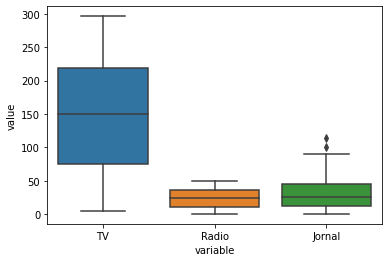

In [ ]:
#Outliers

# BOX PLOT

sns.boxplot(data=df2.drop(columns='Vendas').melt(), x="variable", y="value")

In [ ]:
filtro = df2['TV'] > 290

df2[filtro]

,TV,Radio,Jornal,Vendas
30,292.9,28.3,43.2,21400.0
35,290.7,4.1,8.5,17800.0
42,293.6,27.7,1.8,20700.0
101,296.4,36.3,100.9,23800.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


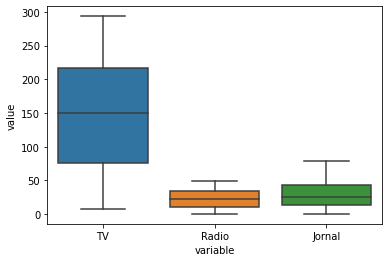

In [ ]:
# Remoção de Outliers
#  Normal    - Isolation Forest
#  Gaussiana - Minimum Covariance Determinant

# contamination = proporção de outliers aceitável

iso = IsolationForest(contamination=0.1)

# Opção 1
# iso.fit(df2)

# iso.predict(df2)

# Opção 2

filtro = iso.fit_predict(df2) != -1

sns.boxplot(data=df2[filtro].drop(columns='Vendas').melt(), x="variable", y="value")

In [ ]:
# confirma a remoção dos outilers
df2 = df2[filtro].copy()
# shape

df2.shape

(180, 4)

# Separação dos Dados

In [ ]:
df3 = df2.copy()

In [ ]:
df3.columns

Index(['TV', 'Radio', 'Jornal', 'Vendas'], dtype='object')

In [ ]:
df3.iloc[:, :3]

,TV,Radio,Jornal
0,230.1,37.8,69.200000
1,44.5,39.3,45.100000
3,151.5,41.3,58.500000
4,180.8,10.8,58.400000
6,57.5,32.8,23.500000
...,...,...,...
194,149.7,35.6,30.621212
195,38.2,3.7,13.800000
196,94.2,4.9,8.100000
197,177.0,9.3,6.400000


In [ ]:
# Separa as features e o alvo
# independentes
# opção 1
X = df3[['TV', 'Radio', 'Jornal']] 

# opção 2
# X = df3.iloc[:, :3]

# dependentes

# opção 1
# y = df3[['Vendas']] 

# opção 2
y = df3.iloc[:, 3]

In [ ]:
X

,TV,Radio,Jornal
0,230.1,37.8,69.200000
1,44.5,39.3,45.100000
3,151.5,41.3,58.500000
4,180.8,10.8,58.400000
6,57.5,32.8,23.500000
...,...,...,...
194,149.7,35.6,30.621212
195,38.2,3.7,13.800000
196,94.2,4.9,8.100000
197,177.0,9.3,6.400000


In [ ]:
y

0      22100.0
1      10400.0
3      16500.0
4      17900.0
6      11800.0
        ...   
194    17300.0
195     7600.0
196    14000.0
197    14800.0
199    18400.0
Name: Vendas, Length: 180, dtype: float64

In [ ]:
#shape
df3.shape

(180, 4)

In [ ]:
# 75% do dataset vai para treino e 25% para teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [ ]:
X.shape

(180, 3)

In [ ]:
X_treino.shape

(135, 3)

In [ ]:
X_teste.shape

(45, 3)

# Seleção de Features

Feature TV: 444.1
Feature Radio: 21.6
Feature Jornal: 2.9


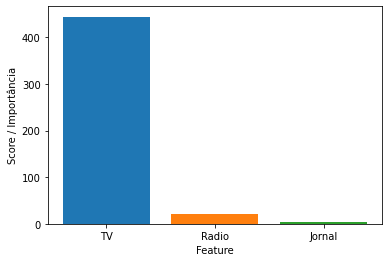

In [ ]:
# Seleção de Features
#  SelectKBest - Correlation Feature Selection
#   For regression: f_regression, mutual_info_regression
#   For classification: chi2, f_classif, mutual_info_classif


fs = SelectKBest(score_func=f_regression, k='all')

fs.fit_transform(X_treino, y_treino)

#display(X_treino.columns)
#display(fs.scores_)

for feature, score in zip(X_treino.columns, fs.scores_):
  print('Feature {}: {:.1f}'.format(feature, score))
  plt.bar(feature, score)

plt.xlabel('Feature')
plt.ylabel('Score / Importância')

plt.show()

In [ ]:
A = ['A', 'B', 'D', 'C']
B = [ 1, 2, 4, 3 ]

list(zip(A, B))

[('A', 1), ('B', 2), ('D', 4), ('C', 3)]

In [ ]:
# Selecionando a feature mais representativa
X_treino = X_treino[['TV']]

X_teste = X_teste[['TV']]

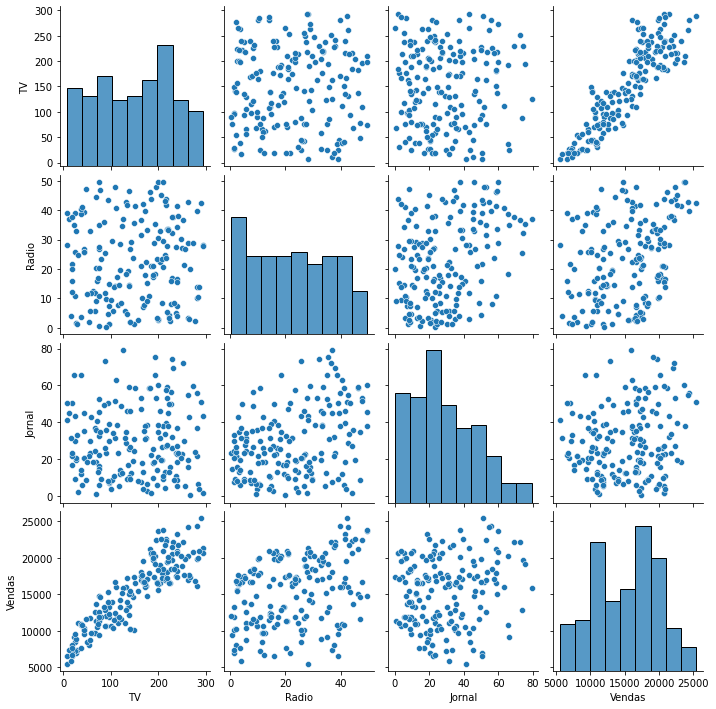

In [ ]:
# Validando 1

sns.pairplot(df3)

plt.show()

In [ ]:
df3.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.030625,0.040173,0.891450
Radio,0.030625,1.000000,0.347964,0.347459
Jornal,0.040173,0.347964,1.000000,0.147573
Vendas,0.891450,0.347459,0.147573,1.000000


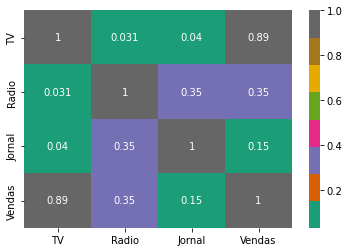

In [ ]:
# Validando 2

sns.heatmap(df3.corr(), cmap="Dark2", annot=True)

plt.show()

# Criação do Modelo

Modelo de regressão linear univariada

`y = ax + b`

`y = c1 * TV + c0`

In [ ]:
# Criamos o modelo e realizamos o treinamento

regressao = LinearRegression()

# Treinar

regressao.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
# mostrar coef

display(regressao.coef_)

display(regressao.intercept_)

array([51.22838187])

7594.9323649363005

In [ ]:
# Modelo

print('y = {:.1f} * TV + {:.1f}'.format(regressao.coef_[0], regressao.intercept_))

y = 51.2 * TV + 7594.9


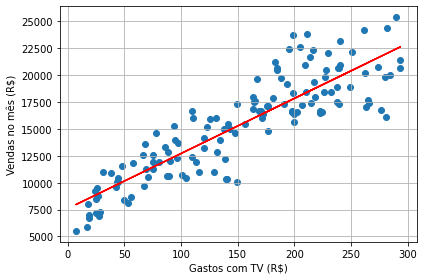

In [ ]:
# Visualização

plt.scatter(X_treino, y_treino)

y_previsto = regressao.coef_[0] * X_treino + regressao.intercept_

plt.plot(X_treino, y_previsto, color='red')


plt.xlabel('Gastos com TV (R$)')
plt.ylabel('Vendas no mês (R$)')

plt.grid(True)

plt.tight_layout()

plt.show()

# Avaliação do Modelo

In [ ]:
# Análise de Resíduos
# Testamos o modelo com os dados de treino e comparamo
#  a saída do modelo com a saída rotulada dos dados de treino


df_residuos = pd.concat([X_treino, y_treino, y_previsto], axis='columns')

df_residuos.columns = ['TV', 'y_esperado', 'y_previsto']

df_residuos.reset_index(inplace=True, drop=True)

df_residuos['y_previsto'] = round(df_residuos['y_previsto'], 1) 

df_residuos['residuo'] = df_residuos['y_esperado'] - df_residuos['y_previsto']

df_residuos

,TV,y_esperado,y_previsto,residuo
0,265.2,17700.0,21180.7,-3480.7
1,18.8,7000.0,8558.0,-1558.0
2,199.8,15600.0,17830.4,-2230.4
3,50.0,8400.0,10156.4,-1756.4
4,139.5,10300.0,14741.3,-4441.3
...,...,...,...,...
130,137.9,15000.0,14659.3,340.7
131,53.5,8100.0,10335.7,-2235.7
132,93.9,15300.0,12405.3,2894.7
133,230.1,22100.0,19382.6,2717.4


In [ ]:
np.average(np.abs(df_residuos['residuo']))

# TV -> R$ 220
# previsão -> 19000
#     -> 19000 - 1764 = R$ 17236
#     -> 19000 + 1764 = R$ 20764

1764.6311111111108

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


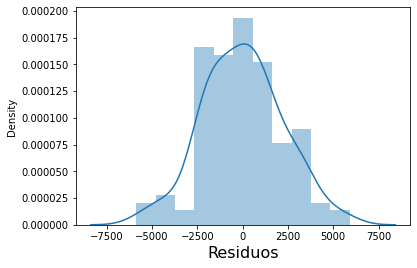

In [ ]:
# Se for uma dististribuição normal
#  com valores concentrados em zero
#  então tudo ok!

sns.distplot(df_residuos['residuo'])

plt.xlabel('Residuos', fontsize=16)

plt.show()

In [ ]:
df_residuos.columns

Index(['TV', 'y_esperado', 'y_previsto', 'residuo'], dtype='object')

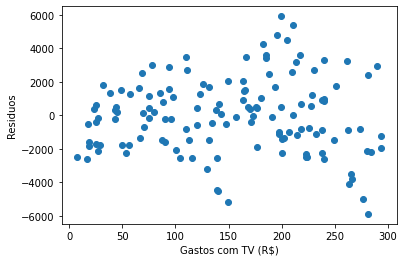

In [ ]:
# Scatter plot dos resíduos
#  deve ser aleatório (ou seja, não tem padrão)
# Um exemplo de um bom residual é um gráfico de dispersão com resíduos 
#  centralizados em torno de 0

plt.scatter(df_residuos['TV'], df_residuos['residuo'])

plt.xlabel('Gastos com TV (R$)')
plt.ylabel('Residuos')

plt.show()
# não existe padrão, então OK!

# Predição de Novos Dados

Agora que treinamos o modelo, nosso objetivo é prever os dados de teste. 

Lembrando que o treino foi feito sem utilizar esses dados!

Assim podemos avaliar o desempenho do mesmo.

In [ ]:
# Aplicando o modelo nos dados de teste

# X_teste

df = pd.concat([X_teste, y_teste], axis='columns').reset_index(drop=True)

df.columns = ['TV', 'y_esperado']

df['y_previsto'] = regressao.predict(X_teste)

df['y_previsto'] = round(df['y_previsto'], 1)

df

,TV,y_esperado,y_previsto
0,39.5,10800.0,9618.5
1,188.4,19900.0,17246.4
2,73.4,10900.0,11355.1
3,204.1,19000.0,18050.6
4,62.3,9700.0,10786.5
5,255.4,19800.0,20678.7
6,102.7,14000.0,12856.1
7,216.4,22600.0,18680.8
8,95.7,11900.0,12497.5
9,206.9,17900.0,18194.1


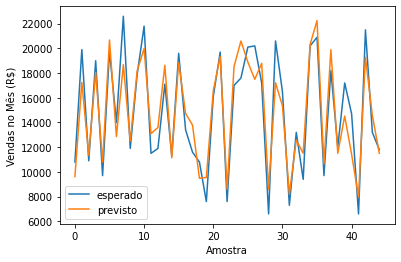

In [ ]:
# Criamos uma lista onde cada posição é um indice
#  do vetor de resposta

index = list(df.index)

# Dados rotulados
plt.plot(index, df['y_esperado'], label='esperado')

# Dados previstos pelo modelo
plt.plot(index, df['y_previsto'], label='previsto')

plt.xlabel('Amostra')
plt.ylabel('Vendas no Mês (R$)')

plt.legend()
# loc='upper right'

plt.show()

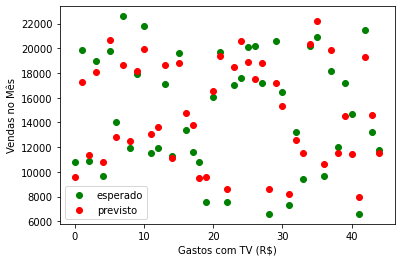

In [ ]:
# Comparação entre os dados rotulados e os previstos pelo modelo

plt.scatter(index, df['y_esperado'], label='esperado', color='green')

plt.scatter(index, df['y_previsto'], label='previsto', color='red')

plt.xlabel('Gastos com TV (R$)')
plt.ylabel('Vendas no Mês')

plt.legend()

plt.show()

# Métricas de Desempenho

In [ ]:
# porcentagem de variação na variável de resposta (dependente) explicada pelo 
# preditor na variável de predição (independente).
# 87% das vendas são explicadas pelos gastos com TV
# quanto mais proximo de 1, mais a variavel explica a resposta
# quanto mais proximo de 0, menos a variavel explica a resposta
# se for menor que 0, a variável é pior do que considerar a média diretamente
print('R²  : {:.2f} (Coefficient of Determination)'.
      format(r2_score(df['y_esperado'], df['y_previsto'])))

# mede a média da diferença quadrática entre o valor observado e o valor real.
# um valor de 0 indica fit perfeito
# MSE penaliza erros grandes.

print('MSE : {:.2f} (Mean Squared Error)'.
      format(mean_squared_error(df['y_esperado'], df['y_previsto'])))

# é a medida da distância entre os valores reais e o valor previsto
# quanto mais proximo de 0 melhor
# é considerado a melhor estatistica
# RMSE também penaliza erros grandes.
print('RMSE: {:.2f} (Root Mean Squared Error)'.
      format(np.sqrt(mean_squared_error(df['y_esperado'], df['y_previsto']))))


# O MAE é uma métrica linear, o que significa que todas as diferenças 
# individuais são ponderadas igualmente na média.
# menor é melhor
# Não preferido em casos em que outliers são proeminentes.
print('MAE : {:.2f} (Mean Absolute Error)'.
      format(mean_absolute_error(df['y_esperado'], df['y_previsto'])))

R²  : 0.87 (Coefficient of Determination)
MSE : 2919238.25 (Mean Squared Error)
RMSE: 1708.58 (Root Mean Squared Error)
MAE : 1451.94 (Mean Absolute Error)


# Linear x Polinomial

## Linear

y = 1 * x
y = 2 * x
y = 3 * x
y = 4 * x
y = 5 * x
y = 6 * x
y = 7 * x
y = 8 * x
y = 9 * x


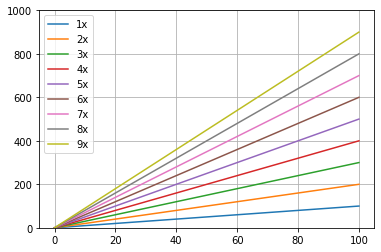

In [ ]:
# Criamos um modelo de regressão LINEAR

# Lembrando o que significa linear.

# y = c1 * X + c0

X_t = np.linspace(0, 100)

for c1 in range(1, 10):
  print('y = {:.0f} * x'.format(c1))

  plt.plot(X_t, c1 * X_t, label=str(c1) + 'x')


plt.ylim([0, 1000])

plt.grid(True)
plt.legend()
plt.show()

y = 1 * x + 250
y = 2 * x + 250
y = 3 * x + 250
y = 4 * x + 250
y = 5 * x + 250
y = 6 * x + 250
y = 7 * x + 250
y = 8 * x + 250
y = 9 * x + 250


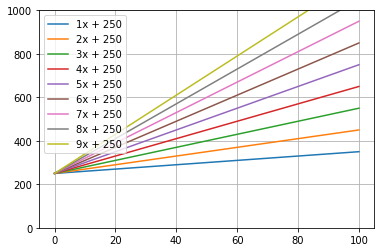

In [ ]:
# Criamos um modelo de regressão LINEAR

# Lembrando o que significa linear.

# Podemos somar uma constante para mudar o deslocamento em y


X_t = np.linspace(0, 100)

c0 = 250
for c1 in range(1, 10):
  print('y = {:.0f} * x + {:.0f}'.format(c1, c0))

  plt.plot(X_t, c1 * X_t + c0, label=str(c1) + 'x + ' + str(c0))


plt.ylim([0, 1000])

plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


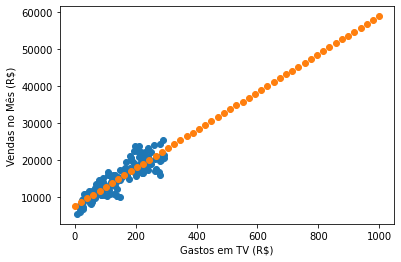

In [ ]:
# Se aplicarmos esse modelo para valores até 1000

X_t = np.linspace(0, 1000)

y_t = regressao.predict(X_t.reshape(-1, 1))

plt.scatter(X_treino, y_treino)
plt.scatter(X_t, y_t)

plt.xlabel('Gastos em TV (R$)')
plt.ylabel('Vendas no Mês (R$)')

plt.show()

# Isso significa linear

## Polinomial

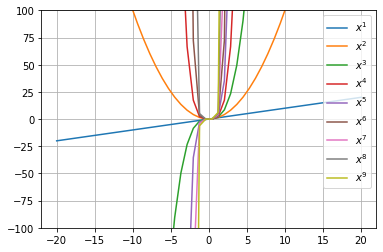

In [ ]:
# Lembrando o que significa Polinomial.

# linear -> c1 * x + c0. -> estimar C1 e C0

# ax + b

# polinomial

# ax^2 + bx + c 

# ax^5 + bx^4 + cx^3 + dx^2 + ex + f  -> estimar A, B, C, D, E, F

# x -> TV

# z -> Jornal

# ax + bz + c -> a, b, c


# ax^5 + bx^4 + cx^3 + dx^2 + ex + f + gz^3 + hz^2 + iz + j -> estimar a, b, c, ... j


X_t = np.linspace(-20, 20)

for grau in range(1, 10):
  plt.plot(X_t, X_t ** grau, label= '$ x^' + str(grau) + '$')

plt.ylim([-100, 100])
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# 2^5 -> 32

2 ** 5

32

In [ ]:
# Lembrando o que significa Polinomial.

# Podemos somar uma constante para mudar o deslocamento em y



In [ ]:
# Lembrando o que significa Polinomial.

# Podemos multiplicação uma constante para mudar o achatamento da curva


1
###############
Grau 1
RMSE: 1708.58 (Root Mean Squared Error)
###############
2
###############
Grau 2
RMSE: 1634.55 (Root Mean Squared Error)
###############
3
###############
Grau 3
RMSE: 1607.75 (Root Mean Squared Error)
###############
7
###############
Grau 7
RMSE: 1539.25 (Root Mean Squared Error)
###############


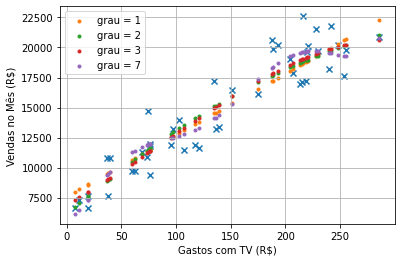

In [ ]:
# Criando um modelo polinomial

# mostrando dados de treino

plt.scatter(X_teste, y_teste, marker='x')

for grau in [1, 2, 3, 7]:
  print(grau)
  # criando seq. de passos da modelagem
  modelo = make_pipeline(PolynomialFeatures(grau), LinearRegression())

  # treinando o modelo polinomial
  modelo.fit(X_treino, y_treino)

  # previsão dos dados teste
  y_previsto = modelo.predict(X_teste)

  # Teste
  plt.scatter(X_teste, y_previsto, marker='.', label='grau = ' + str(grau))

  print('#' * 15)

  print('Grau', grau)

  print('RMSE: {:.2f} (Root Mean Squared Error)'.
      format(np.sqrt(mean_squared_error(y_teste, y_previsto))))

  print('#' * 15)

plt.xlabel('Gastos com TV (R$)')
plt.ylabel('Vendas no Mês (R$)')

plt.grid(True)
plt.legend()
plt.show()

# Produção

Podemos criar uma API e colocar nosso modelo em produção utilizando diversas técnicas que incluem


*   Python + AWS Lambda
*   Python + Flask API
*   Python + Heroku

Teremos uma aula sobre isso :)

## Simulação de uma API

In [ ]:
# Criamos o modelo e realizamos o treinamento

while True:
  TV = float(input('Quanto você deseja investir de marketing em TV? R$ '))

  if TV <= 0:
    break

  TV = np.array(TV).reshape(-1, 1)

  y = regressao.predict(TV)

  print('Estimativa de Vendas no Mês: R$ {:.0f}\n'.format(float(y)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Estimativa de Vendas no Mês: R$ 7646



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Estimativa de Vendas no Mês: R$ 8620



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Estimativa de Vendas no Mês: R$ 33209



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Estimativa de Vendas no Mês: R$ 25525

